![image](how.png)

**"Should I Stay or Should i Go (from the Hospital)"**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load libraries
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
seed = 0

In [3]:
df = pd.read_csv("healthcare/train_set.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
0     100000 non-null int64
1     100000 non-null int64
2     100000 non-null object
3     100000 non-null int64
4     100000 non-null object
5     100000 non-null int64
6     100000 non-null object
7     100000 non-null object
8     100000 non-null object
9     99967 non-null float64
10    100000 non-null int64
11    98517 non-null float64
12    100000 non-null object
13    100000 non-null object
14    100000 non-null int64
15    100000 non-null object
16    100000 non-null float64
17    100000 non-null object
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [6]:
# PROBLEMA DE CLASIFICACIÓN
df["17"].value_counts()

21-30                 27452
11-20                 24476
31-40                 17311
51-60                 10984
0-10                   7427
41-50                  3668
71-80                  3297
More than 100 Days     2150
81-90                  1470
91-100                  908
61-70                   857
Name: 17, dtype: int64

In [7]:
# esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta
# Nan no vale pero 0 sí
#df = df.dropna()
# esto quita filas y por tanto no se lo podremos aplicar al dataset de predicción

In [8]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender...
# quitar otras columnas es decisión vuestra como futuros data scientists 
df.drop("0",1,inplace = True)

In [9]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

11    1.483
9     0.033
8     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
17    0.000
16    0.000
10    0.000
12    0.000
13    0.000
14    0.000
15    0.000
1     0.000
dtype: float64


In [10]:
# Elimino columna 9 y 11 por tener nan
df.drop(["9", "11"],1,inplace = True)
df

,1,2,3,4,5,6,7,8,10,12,13,14,15,16,17
0,6,a,6,X,2,gynecology,R,F,45810,Urgent,Moderate,2,21-30,2817.0,0-10
1,23,a,6,X,4,gynecology,Q,F,128565,Trauma,Moderate,4,51-60,4498.0,21-30
2,2,c,5,Z,2,anesthesia,S,F,46565,Urgent,Moderate,2,71-80,4573.0,11-20
3,32,f,9,Y,3,gynecology,S,B,124546,Emergency,Moderate,4,11-20,7202.0,51-60
4,14,a,1,X,3,gynecology,S,E,22729,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12,a,9,Y,3,gynecology,R,B,82914,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
99996,28,b,11,X,2,gynecology,R,F,40026,Urgent,Moderate,3,21-30,4005.0,51-60
99997,6,a,6,X,3,gynecology,Q,F,92346,Trauma,Minor,2,31-40,5215.0,31-40
99998,32,f,9,Y,2,gynecology,S,B,113798,Trauma,Moderate,3,41-50,5092.0,11-20


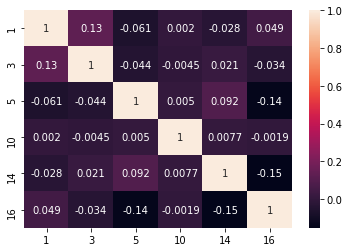

In [11]:
# Matriz de correlación
# No encuentro mucha correlación. Entrenaré con todos los datos
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### 1. Definir X e y

In [12]:
X = df.drop(columns=["17"])
X

,1,2,3,4,5,6,7,8,10,12,13,14,15,16
0,6,a,6,X,2,gynecology,R,F,45810,Urgent,Moderate,2,21-30,2817.0
1,23,a,6,X,4,gynecology,Q,F,128565,Trauma,Moderate,4,51-60,4498.0
2,2,c,5,Z,2,anesthesia,S,F,46565,Urgent,Moderate,2,71-80,4573.0
3,32,f,9,Y,3,gynecology,S,B,124546,Emergency,Moderate,4,11-20,7202.0
4,14,a,1,X,3,gynecology,S,E,22729,Urgent,Moderate,2,51-60,3398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12,a,9,Y,3,gynecology,R,B,82914,Emergency,Moderate,6,51-60,3966.0
99996,28,b,11,X,2,gynecology,R,F,40026,Urgent,Moderate,3,21-30,4005.0
99997,6,a,6,X,3,gynecology,Q,F,92346,Trauma,Minor,2,31-40,5215.0
99998,32,f,9,Y,2,gynecology,S,B,113798,Trauma,Moderate,3,41-50,5092.0


In [13]:
X.shape

(100000, 14)

In [14]:
y = df['17']
y

0                      0-10
1                     21-30
2                     11-20
3                     51-60
4                     51-60
                ...        
99995    More than 100 Days
99996                 51-60
99997                 31-40
99998                 11-20
99999                 41-50
Name: 17, Length: 100000, dtype: object

In [15]:
# Columnas tipo object -- categóricas

df.select_dtypes('object').columns.tolist()

['2', '4', '6', '7', '8', '12', '13', '15', '17']

In [16]:
# Paso las columnas "Object" a numéricas
# Encode all object columns 
X_categorical_no_numbers = X[X.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
X_categorical_no_numbers

,2,4,6,7,8,12,13,15
0,0,0,2,2,5,2,2,2
1,0,0,2,1,5,1,2,5
2,2,2,1,3,5,2,2,7
3,5,1,2,3,1,0,2,1
4,0,0,2,3,4,2,2,5
...,...,...,...,...,...,...,...,...
99995,0,1,2,2,1,0,2,5
99996,1,0,2,2,5,2,2,2
99997,0,0,2,1,5,1,1,3
99998,5,1,2,3,1,1,2,4


In [17]:
# Cojo solo columnas numéricas
X_others = X.select_dtypes(exclude=['object'])
X_others 

,1,3,5,10,14,16
0,6,6,2,45810,2,2817.0
1,23,6,4,128565,4,4498.0
2,2,5,2,46565,2,4573.0
3,32,9,3,124546,4,7202.0
4,14,1,3,22729,2,3398.0
...,...,...,...,...,...,...
99995,12,9,3,82914,6,3966.0
99996,28,11,2,40026,3,4005.0
99997,6,6,3,92346,2,5215.0
99998,32,9,2,113798,3,5092.0


In [18]:
# Normalizo las columnas numéricas
scaler = MinMaxScaler()
X_others_normalized = pd.DataFrame(
    data=scaler.fit_transform(X_others.values), 
    columns=X_others.columns, 
    index=X_others.index)

X_others_normalized


,1,3,5,10,14,16
0,0.161290,0.416667,0.083333,0.348032,0.06250,0.112475
1,0.709677,0.416667,0.166667,0.976759,0.12500,0.298385
2,0.032258,0.333333,0.083333,0.353768,0.06250,0.306680
3,1.000000,0.666667,0.125000,0.946225,0.12500,0.597434
4,0.419355,0.000000,0.125000,0.172675,0.06250,0.176731
...,...,...,...,...,...,...
99995,0.354839,0.666667,0.125000,0.629928,0.18750,0.239549
99996,0.870968,0.833333,0.083333,0.304088,0.09375,0.243862
99997,0.161290,0.416667,0.125000,0.701587,0.06250,0.377682
99998,1.000000,0.666667,0.083333,0.864568,0.09375,0.364079


In [46]:
# Concatenando las anteriores máscaras del dataframe, tengo el dataframe original
# pero con las columnas categóricas pasadas a números.

# Esta es mi X con todos los datos con los que generaré el modelo.
X = pd.concat([X_others, X_categorical_no_numbers], axis=1)
X

,1,3,5,10,14,16,2,4,6,7,8,12,13,15
0,6,6,2,45810,2,2817.0,0,0,2,2,5,2,2,2
1,23,6,4,128565,4,4498.0,0,0,2,1,5,1,2,5
2,2,5,2,46565,2,4573.0,2,2,1,3,5,2,2,7
3,32,9,3,124546,4,7202.0,5,1,2,3,1,0,2,1
4,14,1,3,22729,2,3398.0,0,0,2,3,4,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12,9,3,82914,6,3966.0,0,1,2,2,1,0,2,5
99996,28,11,2,40026,3,4005.0,1,0,2,2,5,2,2,2
99997,6,6,3,92346,2,5215.0,0,0,2,1,5,1,1,3
99998,32,9,2,113798,3,5092.0,5,1,2,3,1,1,2,4


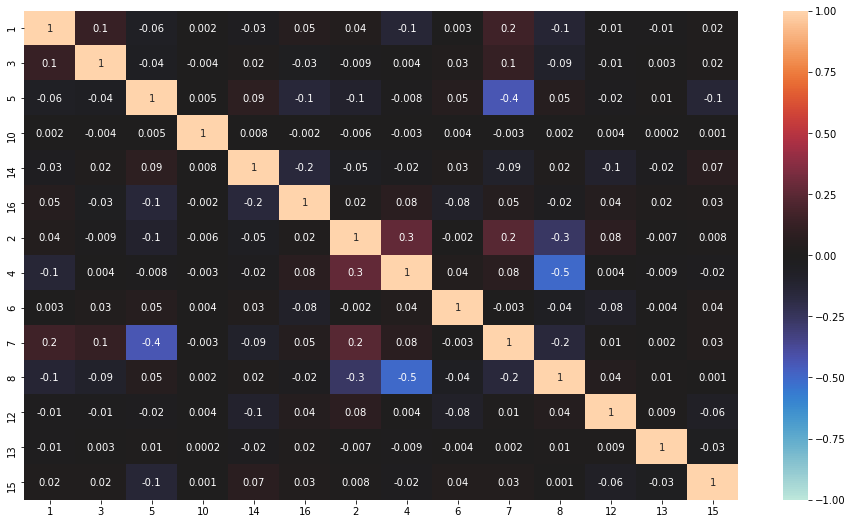

In [47]:
# Segunda Matriz de correlación
# No encuentro mucha correlación. Entrenaré con todos los datos
plt.figure(figsize = (16,9))

sns.heatmap(X.corr(),annot = True,fmt='.1g', vmin=-1, vmax=1, center= 0, linecolor='green')

#### 2. Dividir X_train, X_test, y_train, y_test

In [48]:
# Primero genero un X_train muy muy pequeño simplemente para probar que funciona todo OK
X_train_SAMPLE, X_test_SAMPLE, y_train_SAMPLE, y_test_SAMPLE = train_test_split(X.values, y.values, test_size=0.90, random_state=seed)

In [49]:
X_train_SAMPLE.shape

(10000, 14)

In [24]:
# Este es la división formal de los datos
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=seed)
X_train.shape

(80000, 14)

In [25]:
# Podemos quitar de la memoria las variables que no estemos utilizando con "del"

del df
del X_others_normalized
del X_categorical_no_numbers

#### 3. Genero el modelo, en este caso estoy usando GridSearch

In [53]:
# Create a pipeline

# Le podemos poner cualquier clasificador. Irá cambiando según va probando pero necesita 1.
pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])

number_of_processors = -2  # -1 all, -2 all but one, ...

logistic_params = {
    'classifier': [LogisticRegression(verbose=True, n_jobs=number_of_processors)],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
    }

random_forest_params = {
    'classifier': [RandomForestClassifier(verbose=True, n_jobs=number_of_processors)],
    'classifier__n_estimators': [10, 100, 1000],
    'classifier__max_features': [1, 2, 3]
    }

svm_params = {
    'classifier': [svm.SVC(verbose=True, n_jobs=number_of_processors)],
    'classifier__kernel':('rbf', 'sigmoid'), 
    'classifier__C':[-1, 0.5, 1], 
    'classifier__degree': [1,2,3,],
    'classifier__coef0': [-1., 0.1, 0.5, 1, ],
    'classifier__gamma': (['auto'])
    }


# Create space of candidate learning algorithms and their hyperparameters
search_space = [
    logistic_params,
    random_forest_params,
    svm_params
    ]

In [54]:
# save the model to disk
pipeline_filename = 'best_models_pipeline.sav'
model_filename = 'best_model.sav'

In [56]:
%%time

# Booleano que cambiaré cuando quiera probar con datos de prueba o con datos formales
sample = True

cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=seed)
# Create grid search 
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=cv, verbose=10, n_jobs=-1)

if sample:
    # Fit grid search -- CON DATOS SAMPLE
    best_models_pipeline = clf.fit(X_train_SAMPLE, y_train_SAMPLE)
else:
    # Para todos los datos
    best_models_pipeline = clf.fit(X_train, y_train)
print("Model trained!")


# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_models_pipeline.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

#SAVE MODEL

# Esta variable representa la clase del mejor modelo que ha encontrado y parcialmente entrenado*. 
best_model = best_models_pipeline.best_estimator_.get_params()['classifier']

pickle.dump(best_models_pipeline, open(pipeline_filename, 'wb'))
pickle.dump(best_model, open(model_filename, 'wb'))
print("Models saved!")

Fitting 5 folds for each of 101 candidates, totalling 505 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.18

Si durante el proceso se para o tarda mucho y ya va regular el ordenador a partir de este momento, sería conveniente mirar los procesos que está ejecutuando tu sistema operativo. 

- En W10 tenemos el administrador de tareas.
- En Mac tenemos el monitor de actividades.

Si detectamos que existen muchos procesos "python" incluso después de parar nuestro jupyter, tenemos que eliminar todos esos procesos:

- En windows 10, podemos ir eliminando cada proceso "python.exe" desde el administrador de programas o ejecutando el script "kill_python.bat". IMPORTANTE: Hay que ejecutarlo con permisos de administrador.

- En mac o linux, tenemos que ejecutar en la línea de comandos una de las siguientes opciones:

    1. pkill -f python
    2. killall python
    3. ps aux | grep python | grep -v grep | awk '{print $2}'
    4. kill $(ps aux | grep python | grep -v grep | awk '{print $2}')

    - En el punto 4 realmente hay un $

Todo lo que hemos hecho antes, lo tenemos guardado en un archivo que podemos usarlo donde queramos sin necesidad del código anterior. 

En este caso, como es una competición y vamos a realizar un submission final, necesitaremos parte de las transformaciones que le hemos hecho a nuestro dataset para poder realizárselo al conjunto final de test que nos proporciona Kaggle.

In [32]:
# Para cargar el modelo

with open(file=model_filename, mode="rb") as model_save:
    model = pickle.load(model_save)
type(model)

sklearn.ensemble._forest.RandomForestClassifier

#### Cuando se utiliza pipeline, se puede coger la clase del modelo que ha sido probado con las mejores features y parcialmente entrenado* así:

    best_model.best_estimator_.get_params()['classifier']

In [58]:
# Esta variable "model" representa la clase de nuestro modelo con los mejores parámetros encontrados por GridSearch
model = best_model

#### 4. Entrenar el modelo con X_train, y_train

In [ ]:
#model = RandomForestClassifier(max_features=3, n_estimators=1000)

In [59]:
%%time
# Opción para entrenar con todo a la vez
model.fit(X_train, y_train)
print("Entrenamiento finalizado!")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Entrenamiento finalizado!
Wall time: 1min 40s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.7min finished


Esto que tenemos abajo es como debería entrenarse nuestro modelo, es decir, con cross_validation. 

Esta es la opción para usar todos los datos de nuestro dataset a la vez por cada Epoch. 
No es recomendable si tenemos recursos limitados. Ahora bien, podemos arreglarlo pasándole los datos poco a poco.

In [97]:
# Opción para entrenar usando cross validation de forma individual
# El modelo generado anteriormente ya está entrenado
k_fold = RepeatedKFold(n_splits=2, n_repeats=2, random_state=seed)
val_score = []
train_score = []
# define the model
# En nuestro caso ya lo tenemos arriba pero podríamos instanciar la clase y entrarla desde 0
#model = RandomForestClassifier(max_features=3, n_estimators=1000)

# Si aparece algo como:
# MemoryError: could not allocate 7340032 bytes
# Tenemos que ir pasando los datos de poco en poco.*

# Ejemplo de cómo pasar todos los datos de golpe usando cross_validation:
for i, (train, val) in enumerate(k_fold.split(X_train)):
    print("############\n############")
    print("Iteración:", i+1, "/", 10)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    print("val:", val)
    print("val_size:", len(val))
    print("batch:", X_train[train])

    # train the model
    model.fit(X_train[train], y_train[train])
    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

#SAVE MODEL

# save the model to disk
filename = 'finished_formal_model.sav'
pickle.dump(model, open(filename, 'wb'))
print("Model saved!")

############
############
Iteración: 1 / 10
train/índices batch: [    0     4     5 ... 79997 79998 79999]
batch_size: 40000
val: [    1     2     3 ... 79991 79993 79994]
val_size: 40000
batch: [[0.90322581 0.25       0.16666667 ... 1.         0.         7.        ]
 [0.32258065 0.08333333 0.16666667 ... 1.         2.         4.        ]
 [0.06451613 0.16666667 0.33333333 ... 2.         2.         4.        ]
 ...
 [1.         0.66666667 0.08333333 ... 2.         2.         4.        ]
 [0.29032258 0.         0.16666667 ... 1.         2.         4.        ]
 [0.90322581 0.25       0.08333333 ... 1.         2.         4.        ]]


MemoryError: could not allocate 5767168 bytes

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [60]:
predictions = model.predict(X_test)
print(predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
['21-30' '51-60' '11-20' ... '11-20' '21-30' '21-30']
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.5s finished


#### 6. Sacar métricas, valorar el modelo 

In [61]:
model.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished


0.37

#### 7. Por último antes de predecir el dataset de predicción de kaggle, tenemos que entrenar nuestro modelo con todos los datos:

### Ejemplo sin validación cruzada

In [ ]:
model.fit(X, y)

In [ ]:
model.score(X, y)

In [ ]:
# Guardamos el modelo entrenado final
pickle.dump(model, open(model_filename, 'wb'))
print("Model saved!")

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [62]:
to_pred = pd.read_csv("healthcare/test_set.csv")

In [63]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [17]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
#to_pred = to_pred.fillna(0)

In [64]:
used_columns = X.columns.values
used_columns

array(['1', '3', '5', '10', '14', '16', '2', '4', '6', '7', '8', '12',
       '13', '15'], dtype=object)

In [65]:
def normalize_dataframe(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(
        data=scaler.fit_transform(df.values), 
        columns=df.columns, 
        index=df.index)
    return df_normalized

# Esta función debería ser usada al principio del todo ya que se realizan los cambios de la misma manera.
def my_transformation(df):
    """
    Esta función utiliza un dataframe original, y lo modifica para retornar el dataframe con todos los cambios realizados que hemos creído convenientes.
    """
    df_modified = df.copy()
    # 1. Elimino columna 9 y 11 por tener nan
    df_modified.drop(["9", "11"],1,inplace=True)
    # 2, 3 y 4. Realizo el encoder de las categóricas además de normalizar
    # 2.Paso las columnas "Object" a numéricas
    X_categorical_no_numbers = df_modified[df_modified.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
    # 3. Cojo solo columnas numéricas
    X_others = df_modified.select_dtypes(exclude=['object'])
    # 4. Normalizo las columnas numéricas
    X_others_normalized = normalize_dataframe(df=X_others)
    # 5. Concateno el resultado final
    df_modified = pd.concat([X_others_normalized, X_categorical_no_numbers], axis=1)
    return df_modified

In [66]:
# Ejecuto la función que transforma el dataframe a predecir
to_pred_modified = my_transformation(df=to_pred)

In [67]:
# Realizo la predicción
predictions_submit = model.predict(to_pred_modified[used_columns])
predictions_submit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   17.0s finished


array(['0-10', '21-30', '0-10', ..., '21-30', '11-20', '21-30'],
      dtype=object)

In [68]:
# Genero mi submission con lo que kaggle quiere que cada usuario suba para luego pasarlo a csv
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,314114,0-10
1,208989,21-30
2,305872,0-10
3,266099,11-20
4,13228,0-10
...,...,...
133739,318155,11-20
133740,144850,0-10
133741,180676,21-30
133742,39933,11-20


#### Comprobamos que mi submission tiene la misma forma que el submission de ejemplo que kaggle deja

In [69]:
sample = pd.read_csv("healthcare/sample_submission.csv")

In [70]:
sample.shape

(133744, 2)

In [71]:
all_ok_to_submit = False
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            submission.to_csv("to_submit_no_reg.csv", index = False)
            all_ok_to_submit = True
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

if all_ok_to_submit:
    print("you're ready to submit! :)")
else: 
    print("Sorry...There was an error :(")

you're ready to submit! :)
